# Introduction
When experimenting with programs related to machine learning, there are times when you want to have random data (dummy data) that is not real data. Let's get familiar with NumPy by creating dummy data with random numbers that follow a normal distribution.

In [131]:
#predefines and imports
import numpy as np
import matplotlib.pyplot as plt

#fix seed
np.random.seed(0)

# Problem 1
## Random numbers
Create 500 random numbers with a two-dimensional normal distribution whose mean is (-3, 0) and whose covariance matrix is
$\begin{bmatrix}1.0 & 0.8\\0.8 & 1.0\end{bmatrix}$

In [132]:
def problem1():
    mean = (-3,0)
    cov = [[1.0,0.8],[0.8,1.0]]
    n = 500
    X = np.random.multivariate_normal(mean,cov,n)
    print('Data shape:' ,X.shape)
    # print(X)
    return X
X = problem1()

Data shape: (500, 2)


# Problem 2
## Visualize by Scatter Plot

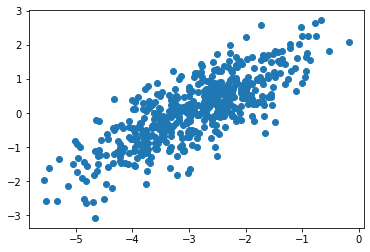

In [133]:
def problem2():
    plt.scatter(X[:,0],X[:,1])
    plt.show()
problem2()

# Problem 3
## Visualize by histogram

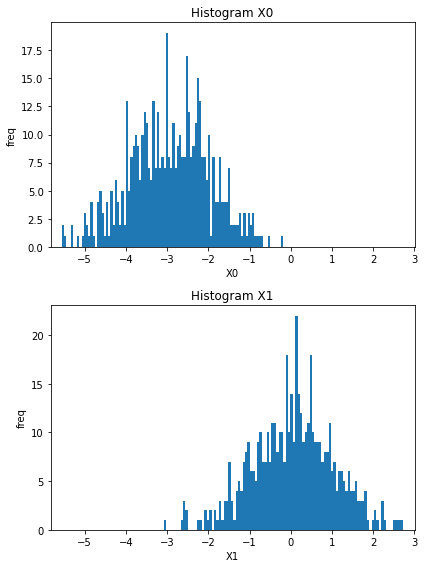

In [134]:
def histogram_for_each_dimension(data: np.array, bins):
    dimensions = data.ndim
    fig = plt.figure(figsize=[6,8])
    axis = fig.subplots(nrows = dimensions) #could've just use sharex here
    l_xlim, r_xlim = 0,0
    for i,ax in enumerate(axis):
        ax.set_title('Histogram X{}'.format(i))
        ax.set_ylabel('freq')
        ax.set_xlabel('X{}'.format(i))
        ax.hist(X[:,i],bins = bins)
        l,r = ax.get_xlim()
        l_xlim = min(l,l_xlim)
        r_xlim = max(r,r_xlim)
    for ax in axis:
        ax.set_xlim(l_xlim,r_xlim)
    plt.tight_layout()
    plt.show()

def problem3():
    
    histogram_for_each_dimension(X,100)
    #setup subplot 
    # fig, axis = plt.subplots(2)
    # bins = 100
    # axis[0].hist(X[:,0],bins = bins)
    # left,right = axis[0].get_xlim()
    # axis[1].hist(X[:,1],bins = bins)
    # left1,right1 = axis[1].get_xlim()
    # axis[0].set_xlim(min(left,left1), max(right,right1))
    # axis[1].set_xlim(min(left,left1), max(right,right1))
    # plt.show()

problem3()

### NOTEs: On problem 3
- For this problem, i had lots of problems with graphing and specifically sub-graphing, arraging graphs.
- I also figured that subplots also has an optional argument 'sharex' to share subplots' axis, which i opted to not use since the assignment required xlim instead
- But due to having lots of problems in this part, i feel like the way i did it is not quite correct. Please suggest if you usually do it differently, or the solution is generally different.
- I hope that our class could have a more detailed session or reading about graphing if possible.

# Problem 4
## Addition Data

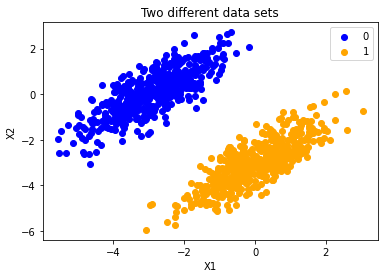

In [135]:
def problem4():
    mean = [0,-3]
    cov = [[1.0,0.8],[0.8,1.0]]
    n = 500
    Y = np.random.multivariate_normal(mean,cov,n)
    
    plt.figure()
    plt.title('Two different data sets')
    plt.xlabel('X1')
    plt.ylabel('X2')
    f1 = plt.scatter(X[:,0],X[:,1], c = 'blue')
    f2 = plt.scatter(Y[:,0],Y[:,1], c = 'orange')
    plt.legend((f1,f2),(0,1))
    return Y

Y= problem4()

# Problem 5
## Concatenation


In [139]:
def problem5():
    return np.concatenate((X,Y)) #or np.vstack(X,Y)
Z = problem5()
print('New concatenated data shape: ', Z.shape)

New concatenated data shape:  (1000, 2)


# Problem 6
## Labeling

In [165]:
def problem6():
    X_labeled = np.append(X,np.zeros((X.shape[0],1)),axis=1) #danger
    Y_labeled = np.append(Y,np.ones((Y.shape[0],1)),axis = 1)
    combined = np.vstack((X_labeled,Y_labeled))
    print(combined)
problem6()

[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.2185878  -3.15676476  1.        ]
 [-1.37970304 -4.27950068  1.        ]
 [ 1.49786804 -2.33126243  1.        ]]


### Note: problem 4
- the function 'append' concatenate \[array] with \[array] not \[array] with <number\> so when i tried appending X with np.zeros(X.shape\[0]), it get dimension mismatch error cause im trying to append X\[i] with 0 not X\[i] with \[0]
- ** Any suggestions on other ways of appending labels to each row of a matrix? How'd you do it? **